# Lasso and Slope estimators

Neste projeto iremos implementar métodos iterativos para achar a solução do seguinte estimador de mínimos quadrados regularizado:

$$
\min_{b\in\mathbb{R}^{p\times1}}f(b)=\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b)^2+\lambda\Vert b\Vert_\sharp, 
$$

onde $(y_1,x_1), \ldots, (y_n,x_n)$ é uma amostra de labels/features em $\mathbb{R}\times\mathbb{R}^p$. Àcima, $\lambda>0$ é um hyper-parâmetro positivo e 

$$
\Vert b\Vert_\sharp := \sum_{j=1}^p\omega[j]b_\sharp[j],
$$

é a *norma Slope* do vetor $b$, onde $\omega\in\mathbb{R}^{p\times1}$ é um vetor de coordenadas positivas não-decrescente e $b_\sharp[1]\ge\ldots,b_\sharp[p]$ simboliza as coordenadas de $b$ postas em ordem não-crescente.  Precisamente, iremos considerar duas opcões:

1. $\omega[j]\equiv1$, 
2. $\omega[j]:=\sqrt{\log(2p/j)}$.

<div hidden>
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\argmin}{argmin}$
</div>

# Soft-Thresholding e ``sortedL1Prox()``

Recorde que o passo de iteração do método gradiente proximal é calcular o *operador proximal* da norma $\lambda\Vert\cdot\Vert_\sharp$:

$$
P(v,\lambda\omega)\in\argmin_{b\in\mathbb{R}^{p\times1}}\left\{
\frac{1}{2}\Vert v - b\Vert_2^2 + \lambda\Vert b\Vert_\sharp
\right\}.
$$

1. Suponha primeiro que $\omega[j]\equiv1$ então $P(v,\lambda\omega)$ tem fórmula explicíta. Dados $\gamma\in\mathbb{R}$, defina

$$
S(\gamma,\lambda):=\sign(\gamma)\cdot\max\{\gamma-\lambda,0\}.
$$

Àcima, $\sign(\gamma)$ é o sinal de $\gamma$. Então, para um vetor $v\in\mathbb{R}^{p\times1}$,

$$
P(v,\lambda\omega)=[S(v[1],\lambda) \ldots S(v[p],\lambda)]^\top
$$

2. No caso do item 2, não existe uma fórmula explícita para $P(v,\lambda\omega)$. Mas podemos usar a função ``sortedL1Prox()`` do pacote ``SLOPE`` escrito em R. Veja [SLOPE](https://cran.r-project.org/web/packages/SLOPE/index.html), assim como introduções em [An intro to SLOPE](https://cran.r-project.org/web/packages/SLOPE/vignettes/introduction.html) e [Proximal Operators](https://cran.r-project.org/web/packages/SLOPE/vignettes/prox-algs.html). Em nossa notação, ``sortedL1Prox(v,lambda*omega)`` computa $P(v,\lambda\omega)$ para a sequência $\omega$.

Antes precisaremos criar um código para boter ler a função `sortedL1Prox()` em Python. Para tanto, precisaremos da biblioteca `rpy2`. Para instalá-lo chame `pip install rpy2` no terminal base de sua maquina. Em R, o pacote ``SLOPE`` precisa estar instalado e fazer o chamado ``library(SLOPE)``.

In [17]:
import matplotlib
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as la

from rpy2 import robjects
from rpy2.robjects.packages import importr

In [18]:
def sortedL1Prox(v,seq):
    '''
    Função que toma (v,seq) e retorna P(v,seq).
    '''
    # R representation in Python of (v,seq):
    r_var = robjects.vectors.FloatVector(np.hstack((v,seq)))
    # Python function to call R function sortedL1Prox()
    func = robjects.r(
    '''
    library(SLOPE)
    function(v,seq) sortedL1Prox(v,seq)
    '''
    )
    # Calling Python function sortedL1Prox using R representation r_var:
    return np.asarray(func(r_var[0:len(r_var)//2], r_var[len(r_var)//2:]))

In [19]:
#Exemplo:
v = 90.0*np.arange(10)
omega = np.ones(10)
lambd = 2.5
seq = lambd*omega
v.shape, omega.shape

((10,), (10,))

In [20]:
sortedL1Prox(v,seq)

array([  0. ,  87.5, 177.5, 267.5, 357.5, 447.5, 537.5, 627.5, 717.5,
       807.5])

# Exercício 1: Gerando dados

1. Construa uma função ``data_genP(p,s,b_mag)`` que toma $p$, $s\in[p]$ e número positivo ``b_mag`` e retorna vetor $p$-dimensional cujas $s$-ézimas primeiras coordenadas são $b_{\text{mag}}$ e as outras são zero.

In [21]:
#Escreva código aqui
def data_genP(p, s, b_mag):
    # Inicializando como um vetor de zeros
    result = np.zeros((p, 1))
    # Substituindo as s primeiras entradas por b_mag
    result[0:s, 0] = b_mag
    return result

In [22]:
#Exemplo:
p=100
s=10
b_mag=2
b_true = data_genP(p,s,b_mag)
b_true

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

2. Construa uma função ``data_genXe(n,p,b_true,sd)`` que toma $n$, $p$, $b_{\text{true}}$ e um número positivo ``sd`` e constrói uma matriz de dados ``X`` $n\times p$ cujas linhas são vetores $x_i^\top$ normais padrão $p$-dimensionais independentes e o vetor ``y`` de dimensão $n$ cujas coordenadas satisfazem

$$
y_i = x_i^\top b_{\text{true}} + \text{sd}\cdot\epsilon_i,
$$
onde $\{\epsilon_i\}_{i=1}^n$ é uma sequência iid de normais padrão. 

In [23]:
#Escreva código aqui
def data_genXe(n, p, b_true, sd):
    # Inicializando X como uma matriz de zeros
    X = np.zeros((n, p))
    # Para cada linha de X...
    for row in range(n):
        # Gera uma distribuição normal padrão
        current_row = np.random.standard_normal((1, p))
        # Salva na linha da matriz
        X[row, :] = current_row

    # Inicializando epsilon como um vetor de zeros
    epsilon = np.zeros(n)

    # Para cada elemento de epsilon...
    for element in range(n):
        # Gera uma distribuição normal padrão
        current_element = np.random.standard_normal()
        # Salva no vetor
        epsilon[element] = current_element

    # Calculando y
    y = X @ b_true + (sd * epsilon).reshape((-1, 1))
    
    return X, y

In [24]:
n = 5

In [25]:
#Exemplo:
sd = 0.1

b_true = data_genP(p,s,b_mag)
X,y = data_genXe(n,p,b_true,sd)
X,y

(array([[ 1.20471035e+00, -9.86824459e-01,  1.56048807e+00,
          2.60800186e-01, -2.00608708e-01, -7.41268279e-01,
         -1.67782523e+00, -3.28703977e-01,  7.90631332e-01,
         -5.93903799e-01,  5.82281798e-01, -2.04709579e+00,
         -1.13704344e+00, -5.44656157e-01,  6.61614343e-01,
         -1.52819790e+00,  1.83930445e+00,  2.98395623e-01,
          2.63551003e-01,  4.55584918e-01, -3.84000932e-01,
         -8.79268826e-01, -2.02196015e-01,  5.43488545e-02,
          9.43277256e-01,  9.13713735e-01, -1.98221784e-02,
         -1.43358754e+00,  6.22526922e-01,  8.68226518e-01,
          2.01287562e-01, -5.36057376e-01,  1.70596738e+00,
          4.85923537e-01, -4.00093684e-01, -1.79318068e-01,
         -2.02107761e-01,  5.45917774e-01, -5.04483490e-02,
          3.50140738e-01,  4.47995211e-01,  1.23783716e+00,
         -8.97934256e-01, -1.31263011e+00, -1.17853383e+00,
         -9.44270629e-01,  2.46159504e-01,  2.51377155e-03,
         -1.88935508e+00,  1.28230626e+0

# Exercício 2: 

Vamos usar o método gradiente proximal para resolver o problema àcima:

\begin{align*}
w_{k+1} &:= b_k - \frac{1}{L}\nabla f(b_k),\\
b_{k+1} &:= P\left(w_{k+1},\frac{\lambda}{L}\omega\right).
\end{align*}

Construa uma função ``linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final)`` onde, $1/L$ é o passo, ``lambd`` ($=\lambda$) é o fator de penalização, ``b0`` é o ponto inicial, a variável ``t_final`` é o número de iterações e:

1. a variável Booleana ``SlopeB`` vale ``False`` se a sequêndia $\omega[j]\equiv1$.
2. a variável Booleana ``SlopeB`` vale ``True`` se $\omega[j]=\sqrt{\log(2p/j)}$. 

A função deve retornar a sequência $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ e o último iterado $b_{\text{t_final}}$. Use penalização

$$
\lambda = \text{sd}\sqrt{\frac{\log p}{n}}, 
$$

e passo $1/L$ com

$$
L = A\lambda_{\max}\left(\frac{X^\top X}{n}\right),
$$ 
para algum ajuste fino $A>0$. 

In [26]:
#Escreva código aqui
def linear_reg(n, p, SlopeB, X, y, L, lambd, b0, t_final):
    # Inicializando o histórico de erros
    error_history = []
    # Começando o b como o b0
    b = b0

    # Se for solicitada a norma Slope, calcula o vetor omega como tal
    if SlopeB:
        omega = np.array([np.sqrt(np.log2(2*p/j)) for j in range(1, p + 1)])
    # Se não, inicializa ele como 1s
    else:
        omega = np.ones(p)

    # Calculando o primeiro erro e salvando ele na lista
    current_error = (1/(2*n))*(np.sum(np.power(y - X @ b, 2)))
    error_history.append(current_error)

    # Para cada iteração...
    for _ in range(t_final):
        # Calcula o gradiente
        gradient = (1/n)*(np.sum((X @ b - y).reshape(-1) * X, axis = 0)).reshape((-1, 1)) + lambd * omega[np.argsort(b)]
        # Calcula o novo w
        w = b - (1/L)*gradient
        # Calcula o novo b
        b = np.matrix((sortedL1Prox(np.array(w).reshape(-1), (lambd/L)*omega))).reshape((-1, 1))
        # Calcula o erro e salva ele na lista
        current_error = (1/(2*n))*(np.sum(np.power(y - X @ b, 2)))
        error_history.append(current_error)

    return error_history, b

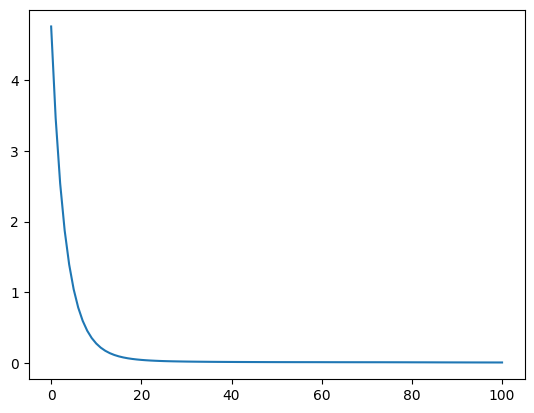

In [27]:
#Exemplo:
b0 = np.asmatrix(np.zeros(p)).T
t_final = 100
SlopeB = False
A = 4
L = A*np.max(la.eigvalsh(X.T @ X / X.shape[0]))
lambd = sd*np.sqrt(np.log(p)/n)      

f1 = linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final)
plt.plot(f1[0])

# Pergunta: 

Varie $A$. O que acontece se $A$ for muito pequeno? Alguma intuição?

**Resposta**: Com $A$ muito pequeno, o tamanho do passo aumentará muito, fazendo com que o algoritmo comece a ficar instável, com o erro do problema não necessariamente diminuindo continuamente.

# Exercício 3: 

Agora, vamos usar o método gradiente proximal acelerado: iniciando de `b0=z0` e $t_0=1$:

\begin{align*}
z_{k+1}&:= P\left(
b_k - (1/L)\nabla f(b_k), \frac{\lambda}{L}\omega
\right),\\
t_{k+1} &:= \frac{1+\sqrt{1+4t_k^2}}{2},\\
b_{k+1} &:= z_{k+1} + \frac{t_{k}-1}{t_{k+1}}(z_{k+1} - z_{k}).
\end{align*}

Construa uma função ``linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)`` onde, $1/L$ é o passo, ``lambd`` ($=\lambda$) é o fator de penalização, ``b0`` é o ponto inicial, a variável ``t_final`` é o número de iterações e:

1. a variável Booleana ``SlopeB`` vale ``False`` se a sequêndia $\omega[j]\equiv1$.
2. a variável Booleana ``SlopeB`` vale ``True`` se $\omega[j]=\sqrt{\log(2p/j)}$. 

A função deve retornar a sequência $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ e o último iterado $b_{\text{t_final}}$. Use penalização

$$
\lambda = \text{sd}\sqrt{\frac{\log p}{n}}.
$$

In [28]:
#Escreva código aqui
def linear_reg_acc(n, p, SlopeB, X, y, L, lambd, b0, t_final):
    # Inicializando o histórico de erros
    error_history = []
    # Inicializando as variáveis
    b = b0
    t0 = 1
    tk = 0
    z0 = 0
    zk = 0

    # Se for solicitada a norma Slope, calcula o vetor omega como tal
    if SlopeB:
        omega = np.array([np.sqrt(np.log2(2*p/j)) for j in range(1, p + 1)])
    # Se não, inicializa ele como 1s
    else:
        omega = np.ones(p)

    # Calculando o primeiro erro e salvando ele na lista
    current_error = (1/(2*n))*(np.sum(np.power(y - X @ b, 2)))
    error_history.append(current_error)

    # Para cada iteração...
    for _ in range(t_final):
        # Calcula o gradiente
        gradient = (1/n)*(np.sum((X @ b - y).reshape(-1) * X, axis = 0)).reshape((-1, 1)) + lambd * omega[np.argsort(b)]
        # Calcula o novo z
        z0 = zk
        zk = np.matrix(sortedL1Prox(np.array(b - (1/L)*gradient).reshape(-1), (lambd/L)*omega)).reshape((-1, 1))
        # Calcula o novo t
        tk = (1 + np.sqrt(1 + 4*t0**2))/2
        # Calcula o novo b
        b = zk + ((t0 - 1)/tk)*(zk - z0)
        # Atualiza tk
        t0 = tk
        # Calcula o erro e salva ele na lista
        current_error = (1/(2*n))*(np.sum(np.power(y - X @ b, 2)))
        error_history.append(current_error)

    return error_history, b

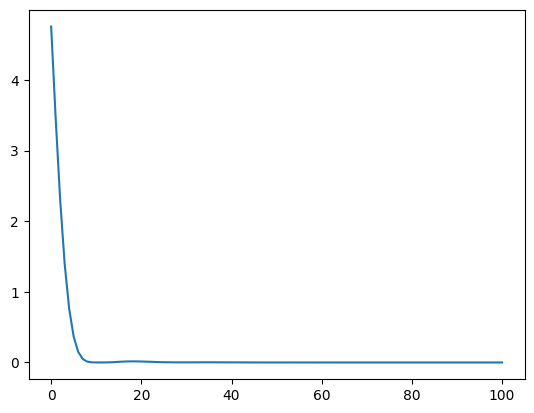

In [29]:
#Exemplo:
b0 = np.asmatrix(np.zeros(p)).T
t_final = 100
SlopeB = False
A = 4
L = A * np.max(la.eigvalsh(X.T @ X / X.shape[0]))
lambd = sd*np.sqrt(np.log(p)/n)      

f2 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)
plt.plot(f2[0])

# Exercício 4: 

Implemente num mesmo gráfico os erros $k\mapsto\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top b_k)^2$ de cada método em função no número de iterações.

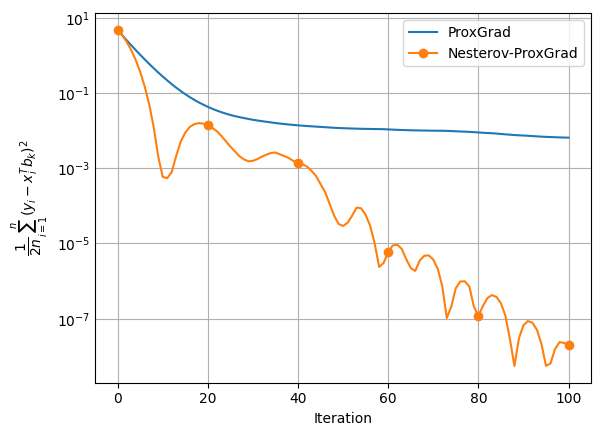

In [30]:
#Escreva código aqui
def plot_graphs(f1, f2):
    # Plotando os dados
    plt.plot(f1[0], label = "ProxGrad")
    plt.plot(f2[0], label = "Nesterov-ProxGrad", marker = "o", markevery = 20)
    # Ajustando os rótulos dos eixos
    plt.xlabel("Iteration")
    plt.ylabel(r"$\dfrac{1}{2n} \sum_{i = 1}^n (y_i - x_i^T b_k)^2$")
    # Colocando o eixo y em escala logarítmica
    plt.yscale("log")
    # Ajustando os ticks do eixo y
    plt.tick_params(axis = "y", which = "both", length = 0)
    # Colocando o grid e a legenda
    plt.grid()
    plt.legend()
    plt.plot()

plot_graphs(f1, f2)

# Exercício 5:

Refaça os exercícios com $\sigma=1$ e $\sigma=10$. Há alguma diferença quando $\sigma=10$? Tem alguma intuição de porque isso acontece?

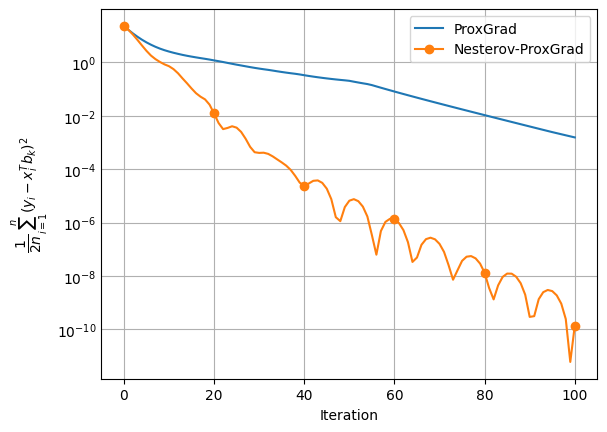

In [31]:
# COLOCANDO SD = 1
sd = 1

b_true = data_genP(p,s,b_mag)
X, y = data_genXe(n,p,b_true,sd)

L = A*np.max(la.eigvalsh(X.T @ X / X.shape[0]))
lambd = sd*np.sqrt(np.log(p)/n)      

f1 = linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final) 
f2 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)

plot_graphs(f1, f2)

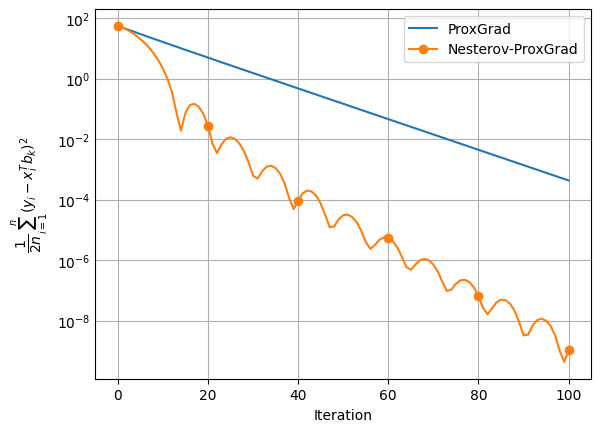

In [32]:
# COLOCANDO SD = 10
sd = 10

b_true = data_genP(p,s,b_mag)
X, y = data_genXe(n,p,b_true,sd)

L = A*np.max(la.eigvalsh(X.T @ X / X.shape[0]))
lambd = sd*np.sqrt(np.log(p)/n)      

f1 = linear_reg(n,p,SlopeB,X,y,L,lambd,b0,t_final) 
f2 = linear_reg_acc(n,p,SlopeB,X,y,L,lambd,b0,t_final)

plot_graphs(f1, f2)

Quando $\sigma = 10$, as predições apresentam um erro final maior. Isso provavelmente ocorre devido justamente à alta variância dos dados, o que acaba confundindo os modelos, que absorvem esse alto ruído como se fosse informação real.